In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px


import warnings

# Ignore all warnings
warnings.filterwarnings("ignore")
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/amazon-sales-dataset/amazon.csv


In [2]:
df = pd.read_csv("/kaggle/input/amazon-sales-dataset/amazon.csv")

In [3]:
df.head(10)

,product_id,product_name,category,discounted_price,actual_price,discount_percentage,rating,rating_count,about_product,user_id,user_name,review_id,review_title,review_content,img_link,product_link
0,B07JW9H4J1,Wayona Nylon Braided USB to Lightning Fast Cha...,Computers&Accessories|Accessories&Peripherals|...,₹399,"₹1,099",64%,4.2,"24,269",High Compatibility : Compatible With iPhone 12...,"AG3D6O4STAQKAY2UVGEUV46KN35Q,AHMY5CWJMMK5BJRBB...","Manav,Adarsh gupta,Sundeep,S.Sayeed Ahmed,jasp...","R3HXWT0LRP0NMF,R2AJM3LFTLZHFO,R6AQJGUP6P86,R1K...","Satisfied,Charging is really fast,Value for mo...",Looks durable Charging is fine tooNo complains...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Wayona-Braided-WN3LG1-Sy...
1,B098NS6PVG,Ambrane Unbreakable 60W / 3A Fast Charging 1.5...,Computers&Accessories|Accessories&Peripherals|...,₹199,₹349,43%,4.0,"43,994","Compatible with all Type C enabled devices, be...","AECPFYFQVRUWC3KGNLJIOREFP5LQ,AGYYVPDD7YG7FYNBX...","ArdKn,Nirbhay kumar,Sagar Viswanathan,Asp,Plac...","RGIQEG07R9HS2,R1SMWZQ86XIN8U,R2J3Y1WL29GWDE,RY...","A Good Braided Cable for Your Type C Device,Go...",I ordered this cable to connect my phone to An...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Ambrane-Unbreakable-Char...
2,B096MSW6CT,Sounce Fast Phone Charging Cable & Data Sync U...,Computers&Accessories|Accessories&Peripherals|...,₹199,"₹1,899",90%,3.9,"7,928",【 Fast Charger& Data Sync】-With built-in safet...,"AGU3BBQ2V2DDAMOAKGFAWDDQ6QHA,AESFLDV2PT363T2AQ...","Kunal,Himanshu,viswanath,sai niharka,saqib mal...","R3J3EQQ9TZI5ZJ,R3E7WBGK7ID0KV,RWU79XKQ6I1QF,R2...","Good speed for earlier versions,Good Product,W...","Not quite durable and sturdy,https://m.media-a...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Sounce-iPhone-Charging-C...
3,B08HDJ86NZ,boAt Deuce USB 300 2 in 1 Type-C & Micro USB S...,Computers&Accessories|Accessories&Peripherals|...,₹329,₹699,53%,4.2,"94,363",The boAt Deuce USB 300 2 in 1 cable is compati...,"AEWAZDZZJLQUYVOVGBEUKSLXHQ5A,AG5HTSFRRE6NL3M5S...","Omkar dhale,JD,HEMALATHA,Ajwadh a.,amar singh ...","R3EEUZKKK9J36I,R3HJVYCLYOY554,REDECAZ7AMPQC,R1...","Good product,Good one,Nice,Really nice product...","Good product,long wire,Charges good,Nice,I bou...",https://m.media-amazon.com/images/I/41V5FtEWPk...,https://www.amazon.in/Deuce-300-Resistant-Tang...
4,B08CF3B7N1,Portronics Konnect L 1.2M Fast Charging 3A 8 P...,Computers&Accessories|Accessories&Peripherals|...,₹154,₹399,61%,4.2,"16,905",[CHARGE & SYNC FUNCTION]- This cable comes wit...,"AE3Q6KSUK5P75D5HFYHCRAOLODSA,AFUGIFH5ZAFXRDSZH...","rahuls6099,Swasat Borah,Ajay Wadke,Pranali,RVK...","R1BP4L2HH9TFUP,R16PVJEXKV6QZS,R2UPDB81N66T4P,R...","As good as original,Decent,Good one for second...","Bought this instead of original apple, does th...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Portronics-Konnect-POR-1...
5,B08Y1TFSP6,pTron Solero TB301 3A Type-C Data and Fast Cha...,Computers&Accessories|Accessories&Peripherals|...,₹149,"₹1,000",85%,3.9,"24,871",Fast Charging & Data Sync: Solero TB301 Type-C...,"AEQ2YMXSZWEOHK2EHTNLOS56YTZQ,AGRVINWECNY7323CW...","Jayesh,Rajesh k.,Soopy,amazon customer,Aman,Sh...","R7S8ANNSDPR40,R3CLZFLHVJU26P,RFF7U7MPQFUGR,R1M...","It's pretty good,Average quality,very good and...","It's a good product.,Like,Very good item stron...",https://m.media-amazon.com/images/I/31wOPjcSxl...,https://www.amazon.in/Solero-TB301-Charging-48...
6,B08WRWPM22,"boAt Micro USB 55 Tangle-free, Sturdy Micro US...",Computers&Accessories|Accessories&Peripherals|...,₹176.63,₹499,65%,4.1,"15,188",It Ensures High Speed Transmission And Chargin...,"AG7C6DAADCTRQJG2BRS3RIKDT52Q,AFU7BOMPVJ7Q3TTA4...","Vivek kumar,Amazon Customer,SARTHAK,Chiranjeev...","R8E73K2KWJRDS,RSD0JTIIWQQL8,R64CRSTE9SLW1,R2FR...","Long durable.,good,Does not charge Lenovo m8 t...",Build quality is good and it is comes with 2 y...,https://m.media-amazon.com/images/W/WEBP_4

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1465 entries, 0 to 1464
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   product_id           1465 non-null   object
 1   product_name         1465 non-null   object
 2   category             1465 non-null   object
 3   discounted_price     1465 non-null   object
 4   actual_price         1465 non-null   object
 5   discount_percentage  1465 non-null   object
 6   rating               1465 non-null   object
 7   rating_count         1463 non-null   object
 8   about_product        1465 non-null   object
 9   user_id              1465 non-null   object
 10  user_name            1465 non-null   object
 11  review_id            1465 non-null   object
 12  review_title         1465 non-null   object
 13  review_content       1465 non-null   object
 14  img_link             1465 non-null   object
 15  product_link         1465 non-null   object
dtypes: obj

In [5]:
df.isnull().sum()

product_id             0
product_name           0
category               0
discounted_price       0
actual_price           0
discount_percentage    0
rating                 0
rating_count           2
about_product          0
user_id                0
user_name              0
review_id              0
review_title           0
review_content         0
img_link               0
product_link           0
dtype: int64

In [6]:
df.loc[df["rating_count"].isnull(), 'rating_count'] = df["rating_count"].mode()[0]

In [7]:
df["discounted_price"] = df["discounted_price"].apply(lambda x : x.replace("₹",""))
df["actual_price"] =  df["actual_price"].apply(lambda x : x.replace("₹",""))

df["discounted_price"] = df["discounted_price"].apply(lambda x : x.replace(",",""))
df["actual_price"] =  df["actual_price"].apply(lambda x : x.replace(",",""))
df["rating_count"] = df['rating_count'].apply(lambda x : x.replace(",",""))
df["discount_percentage"] = df["discount_percentage"].apply(lambda x : x.replace("%",""))


In [8]:
columns_to_convert = [
    'discounted_price', 
    'actual_price', 
    'discount_percentage', 
    'rating', 
    'rating_count'
]

for col in columns_to_convert:
    df[col] = pd.to_numeric(df[col], errors='coerce')

In [9]:
df.loc[df['rating'].isnull(), 'rating']= df['rating'].mode()[0]

In [10]:
df['category'] = df['category'].str.split("|").str.get(0)
df['product_type'] = df['category'].str.split("|").str.get(-1)
df['total_sales'] = df['actual_price'] * df['rating_count']
df

,product_id,product_name,category,discounted_price,actual_price,discount_percentage,rating,rating_count,about_product,user_id,user_name,review_id,review_title,review_content,img_link,product_link,product_type,total_sales
0,B07JW9H4J1,Wayona Nylon Braided USB to Lightning Fast Cha...,Computers&Accessories,399.0,1099.0,64,4.2,24269,High Compatibility : Compatible With iPhone 12...,"AG3D6O4STAQKAY2UVGEUV46KN35Q,AHMY5CWJMMK5BJRBB...","Manav,Adarsh gupta,Sundeep,S.Sayeed Ahmed,jasp...","R3HXWT0LRP0NMF,R2AJM3LFTLZHFO,R6AQJGUP6P86,R1K...","Satisfied,Charging is really fast,Value for mo...",Looks durable Charging is fine tooNo complains...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Wayona-Braided-WN3LG1-Sy...,Computers&Accessories,26671631.0
1,B098NS6PVG,Ambrane Unbreakable 60W / 3A Fast Charging 1.5...,Computers&Accessories,199.0,349.0,43,4.0,43994,"Compatible with all Type C enabled devices, be...","AECPFYFQVRUWC3KGNLJIOREFP5LQ,AGYYVPDD7YG7FYNBX...","ArdKn,Nirbhay kumar,Sagar Viswanathan,Asp,Plac...","RGIQEG07R9HS2,R1SMWZQ86XIN8U,R2J3Y1WL29GWDE,RY...","A Good Braided Cable for Your Type C Device,Go...",I ordered this cable to connect my phone to An...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Ambrane-Unbreakable-Char...,Computers&Accessories,15353906.0
2,B096MSW6CT,Sounce Fast Phone Charging Cable & Data Sync U...,Computers&Accessories,199.0,1899.0,90,3.9,7928,【 Fast Charger& Data Sync】-With built-in safet...,"AGU3BBQ2V2DDAMOAKGFAWDDQ6QHA,AESFLDV2PT363T2AQ...","Kunal,Himanshu,viswanath,sai niharka,saqib mal...","R3J3EQQ9TZI5ZJ,R3E7WBGK7ID0KV,RWU79XKQ6I1QF,R2...","Good speed for earlier versions,Good Product,W...","Not quite durable and sturdy,https://m.media-a...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Sounce-iPhone-Charging-C...,Computers&Accessories,15055272.0
3,B08HDJ86NZ,boAt Deuce USB 300 2 in 1 Type-C & Micro USB S...,Computers&Accessories,329.0,699.0,53,4.2,94363,The boAt Deuce USB 300 2 in 1 cable is compati...,"AEWAZDZZJLQUYVOVGBEUKSLXHQ5A,AG5HTSFRRE6NL3M5S...","Omkar dhale,JD,HEMALATHA,Ajwadh a.,amar singh ...","R3EEUZKKK9J36I,R3HJVYCLYOY554,REDECAZ7AMPQC,R1...","Good product,Good one,Nice,Really nice product...","Good product,long wire,Charges good,Nice,I bou...",https://m.media-amazon.com/images/I/41V5FtEWPk...,https://www.amazon.in/Deuce-300-Resistant-Tang...,Computers&Accessories,65959737.0
4,B08CF3B7N1,Portronics Konnect L 1.2M Fast Charging 3A 8 P...,Computers&Accessories,154.0,399.0,61,4.2,16905,[CHARGE & SYNC FUNCTION]- This cable comes wit...,"AE3Q6KSUK5P75D5HFYHCRAOLODSA,AFUGIFH5ZAFXRDSZH...","rahuls6099,Swasat Borah,Ajay Wadke,Pranali,RVK...","R1BP4L2HH9TFUP,R16PVJEXKV6QZS,R2UPDB81N66T4P,R...","As good as original,Decent,Good one for second...","Bought this instead of original apple, does th...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Portronics-Konnect-POR-1...,Computers&Accessories,6745095.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1460,B08L7J3T31,Noir Aqua - 5pcs PP Spun Filter + 1 Spanner | ...,Home&Kitchen,379.0,919.0,59,4.0,1090,SUPREME QUALITY 90 GRAM 3 LAYER THIK PP SPUN F...,"AHITFY6AHALOFOHOZEOC6XBP4FEA,AFRABBODZJZQB6Z4U...","Prabha ds,Raghuram bk,Real Deal,Amazon Custome...","R3G3XFHPBFF0E8,R3C0BZCD32EIGW,R2EBVBCN9QPD9R,R...","Received the product without spanner,Excellent...","I received product without spanner,Excellent p...",https://m.media-amazon.com/images/I/41fDdRtjfx...,https://www.amazon.in/Noir-Aqua-Spanner-Purifi...,Home&Kitchen,1001710.0
1461,B01M6453MB,Prestige Delight PRWO Electric Rice Cooker (1 ...,Home&Kitchen,2280.0,3045.0,25,4.1,4118,"230 Volts, 400 watts, 1 Year","AFG5FM3NEMOL6BNFRV2NK5FNJCHQ,AGEINTRN6Z563RMLH...","Manu Bhai,Naveenpittu,Evatira Sangma,JAGANNADH...","R3DDL2UPKQ2CK9,R2SYYU1OATVIU5,R1VM993161IYRW,R...","ok,everything was good couldn't return bcoz I ...","ok,got everything as mentioned but the measuri...",https://

# Exploratory Data Analysis (EDA)

## Summary Statistics

In [11]:
df.describe()

,discounted_price,actual_price,discount_percentage,rating,rating_count,total_sales
count,1465.000000,1465.000000,1465.000000,1465.000000,1465.000000,1.465000e+03
mean,3125.310874,5444.990635,47.691468,4.096587,18283.367235,8.283000e+07
std,6944.304394,10874.826864,21.635905,0.291574,42725.921124,2.369510e+08
min,39.000000,39.000000,0.000000,2.000000,2.000000,1.673000e+03
25%,325.000000,800.000000,32.000000,4.000000,1191.000000,1.454471e+06
50%,799.000000,1650.000000,50.000000,4.100000,5179.000000,8.589270e+06
75%,1999.000000,4295.000000,63.000000,4.300000,17325.000000,5.012553e+07
max,77990.000000,139900.000000,94.000000,5.000000,426973.000000,3.451882e+09


## Unique Counts

In [12]:
df.nunique()

product_id             1351
product_name           1337
category                  9
discounted_price        550
actual_price            449
discount_percentage      92
rating                   25
rating_count           1143
about_product          1293
user_id                1194
user_name              1194
review_id              1194
review_title           1194
review_content         1212
img_link               1412
product_link           1465
product_type              9
total_sales            1302
dtype: int64

## Missing Value Analysis

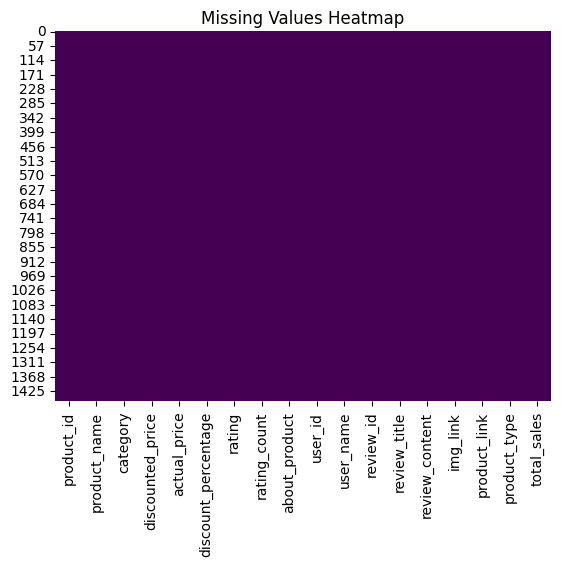

Series([], dtype: float64)


In [13]:
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Values Heatmap')
plt.show()

# Calculate missing value percentage
missing_percentage = (df.isnull().sum() / len(df)) * 100
print(missing_percentage[missing_percentage > 0])

## Data Types

In [14]:
df.dtypes

product_id              object
product_name            object
category                object
discounted_price       float64
actual_price           float64
discount_percentage      int64
rating                 float64
rating_count             int64
about_product           object
user_id                 object
user_name               object
review_id               object
review_title            object
review_content          object
img_link                object
product_link            object
product_type            object
total_sales            float64
dtype: object

## Visualizations

### Feature Distribution

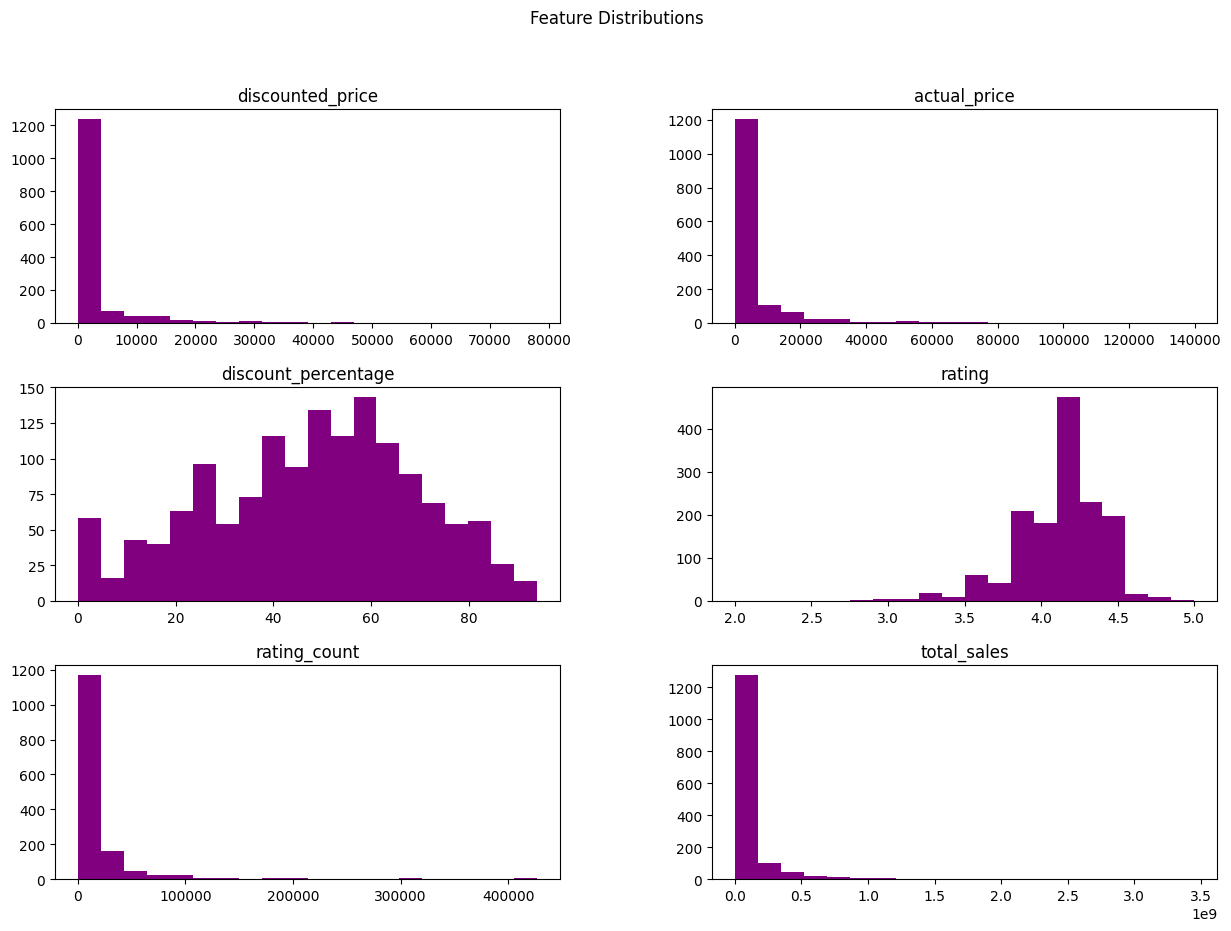

In [15]:
df.hist(bins=20, figsize=(15, 10), grid=False, color = 'purple')
plt.suptitle('Feature Distributions')
plt.show()

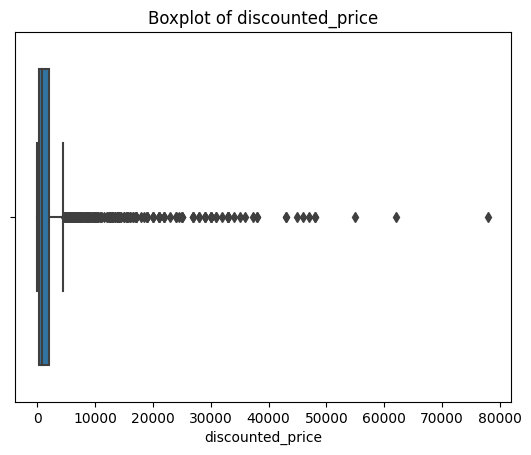

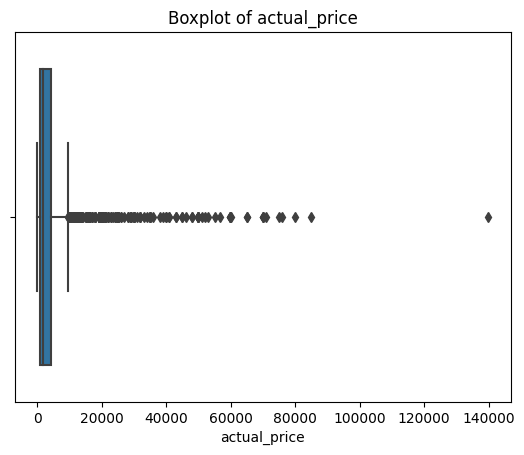

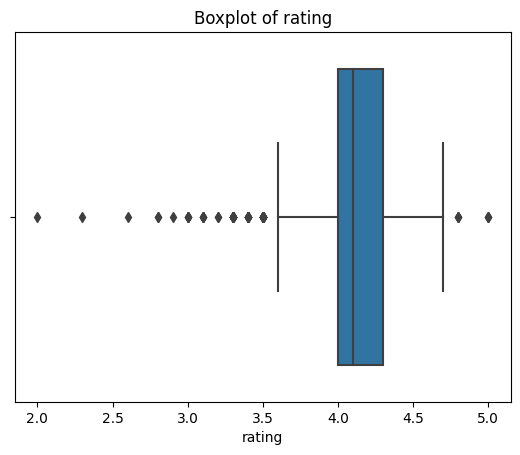

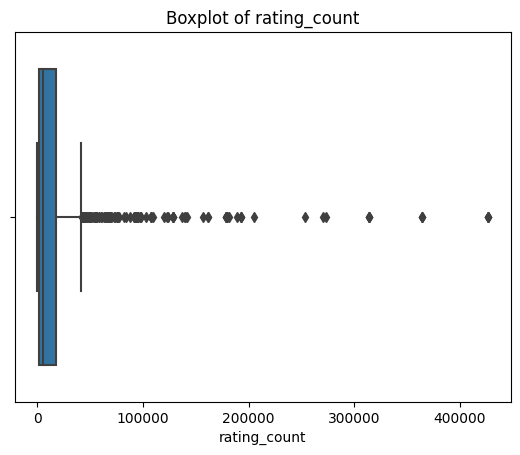

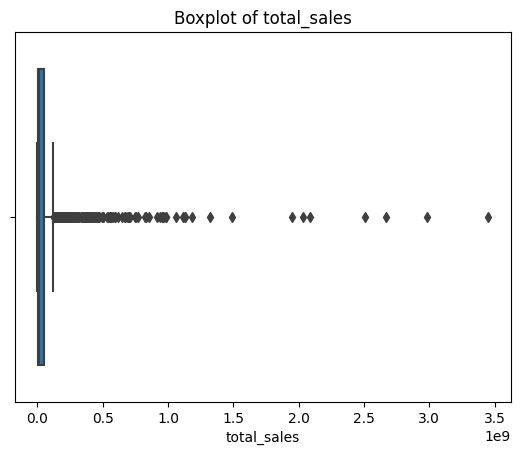

In [16]:
for column in ['discounted_price', 'actual_price', 'rating', 'rating_count', 'total_sales']:
    sns.boxplot(x=df[column])
    plt.title(f'Boxplot of {column}')
    plt.show()

In [17]:
px.scatter(
    df,
    x='discounted_price',
    y='total_sales',
    title='Discounted Price vs Total Sales',
    labels={'discounted_price': 'Discounted Price', 'total_sales': 'Total Sales'},
    color='product_type'
).show()

In [18]:
category_sales = df.groupby('product_type')['total_sales'].sum().reset_index().nlargest(10, 'total_sales')
fig = px.bar(category_sales, x='product_type', y='total_sales', title='Total Sales by Product Type',
             text='total_sales', color='total_sales', color_continuous_scale='Viridis')
fig.update_traces(texttemplate='%{text:.2f}', textposition='outside')
fig.show()

## Correlation Matrix

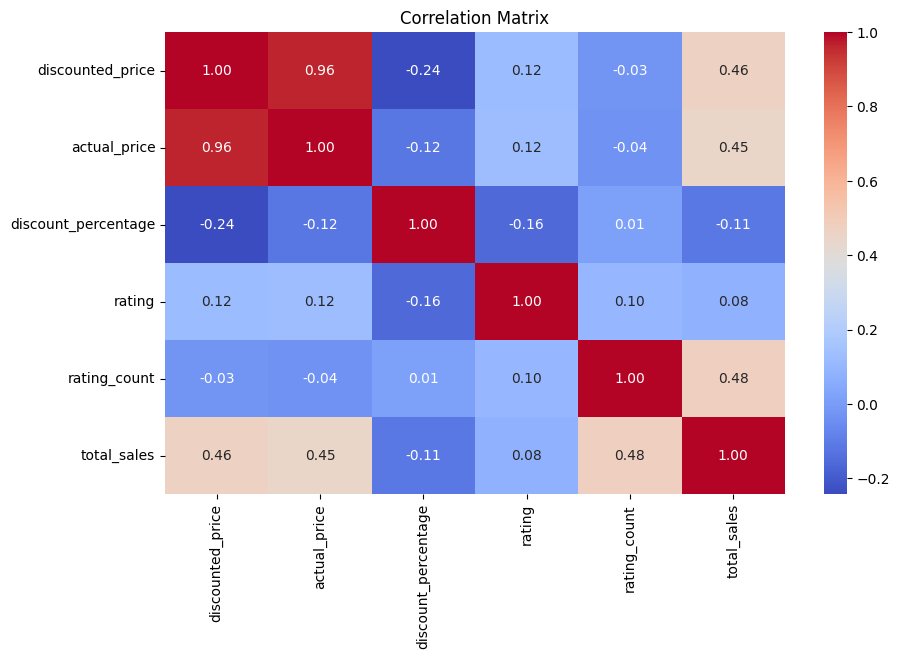

In [19]:
numeric_columns = [
    'discounted_price', 
    'actual_price', 
    'discount_percentage', 
    'rating', 
    'rating_count',
    'total_sales'
]
df_corr = df[numeric_columns]
correlation_matrix = df_corr.corr()

# Display the correlation matrix
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

F-statistic: 13.75
P-value: 1.2112481220551012e-06
Significant impact: Discounts have a noticeable effect on total sales.


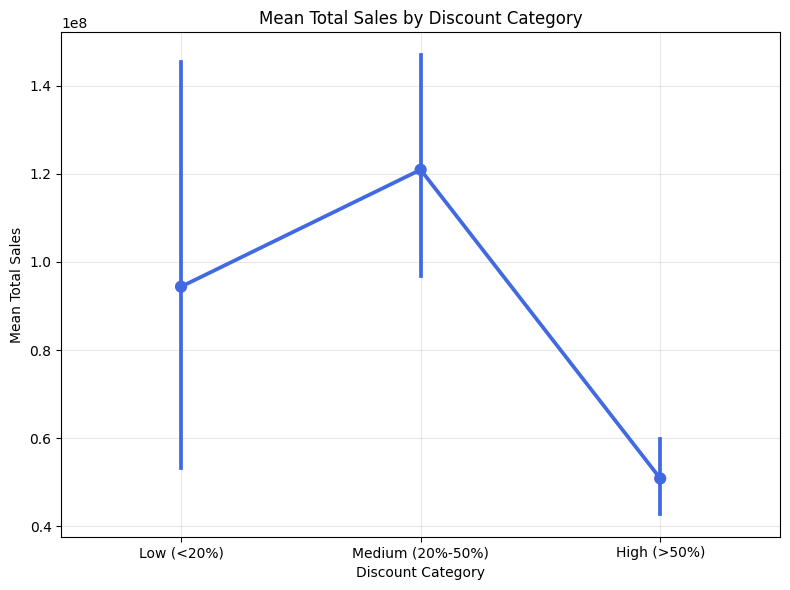

In [20]:
from scipy.stats import f_oneway
low_discount = df[df['discount_percentage'] < 20]['total_sales']
medium_discount = df[(df['discount_percentage'] >= 20) & (df['discount_percentage'] <= 50)]['total_sales']
high_discount = df[df['discount_percentage'] > 50]['total_sales']

# Perform ANOVA test
f_stat, p_val = f_oneway(low_discount, medium_discount, high_discount)

# Print ANOVA results
print(f"F-statistic: {f_stat:.2f}")
print(f"P-value: {p_val}")
if p_val < 0.05:
    print("Significant impact: Discounts have a noticeable effect on total sales.")
else:
    print("No significant impact: Discounts may not strongly influence total sales.")

# Visualize the mean total sales by discount category
df['discount_category'] = pd.cut(df['discount_percentage'], bins=[0, 20, 50, 100],
                                   labels=['Low (<20%)', 'Medium (20%-50%)', 'High (>50%)'])
plt.figure(figsize=(8, 6))
sns.pointplot(x='discount_category', y='total_sales', data=df, ci=95, color='royalblue', markers='o', linestyles='-')
plt.title('Mean Total Sales by Discount Category')
plt.xlabel('Discount Category')
plt.ylabel('Mean Total Sales')
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()


## Number of Products per Category

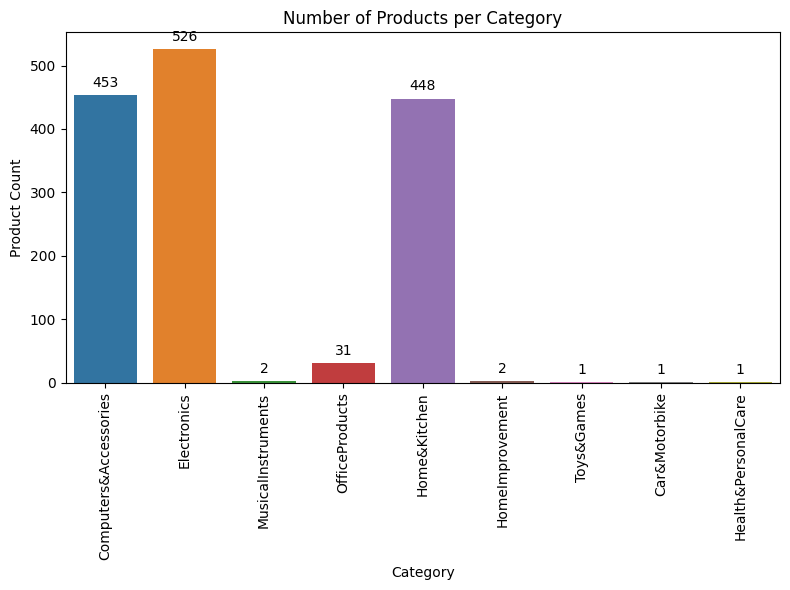

In [21]:
plt.figure(figsize=(8, 6))
ax = sns.countplot(data=df, x='product_type', palette="tab10")
plt.title('Number of Products per Category')
plt.xlabel('Category')
plt.ylabel('Product Count')
plt.xticks(rotation=90)
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'), (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 9), textcoords='offset points')
plt.tight_layout()
plt.show()

## Top Produnts By Number of Reviews

In [22]:
top_reviewed = df.groupby('product_type')['review_id'].count().reset_index()

# Sort products by the number of reviews and get the top 10
top_reviewed_sorted = top_reviewed.sort_values(by='review_id', ascending=False)
top_10_reviewed = top_reviewed_sorted

# Plotting with Plotly
fig = px.bar(
    top_10_reviewed, 
    x='product_type', 
    y='review_id', 
    title="Top 10 Products with the Most Reviews",
    labels={'product_type': 'Product Type', 'review_id': 'Number of Reviews'},
    template="plotly_dark",
    text='review_id'  # Add review counts as text on the bars
)

# Customize the text display on the bars
fig.update_traces(texttemplate='%{text}', textposition='outside')

# Update layout for better readability
fig.update_layout(
    xaxis_tickangle=-45,  # Rotate x-axis labels for readability
    title_font_size=16,
    xaxis_title="Product Type",
    yaxis_title="Number of Reviews",
    font=dict(size=12)
)

# Show the plot
fig.show()

## Actual price Vs. Rating

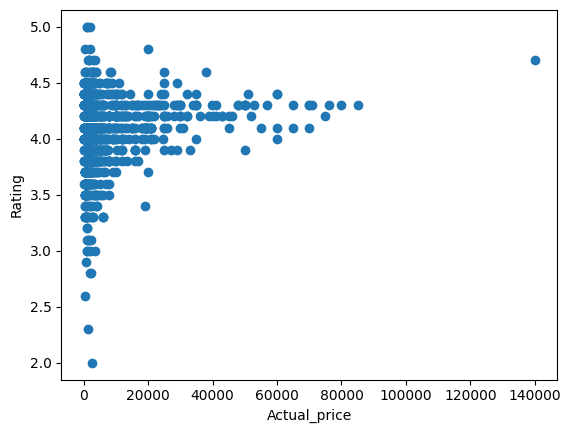

In [23]:
# Plot actual_price vs. rating
plt.scatter(df['actual_price'], df['rating'])
plt.xlabel('Actual_price')
plt.ylabel('Rating')
plt.show()

# Machine Leasrning: Predicting Total Sales

Mean Squared Error (MSE): 1.052904810062472e+16
Root Mean Squared Error (RMSE): 102611149.98198159
R² Score: 0.8775344978003868


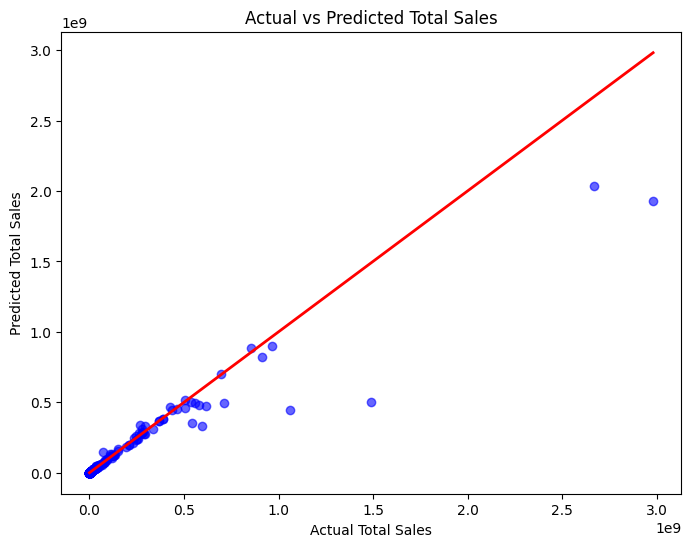

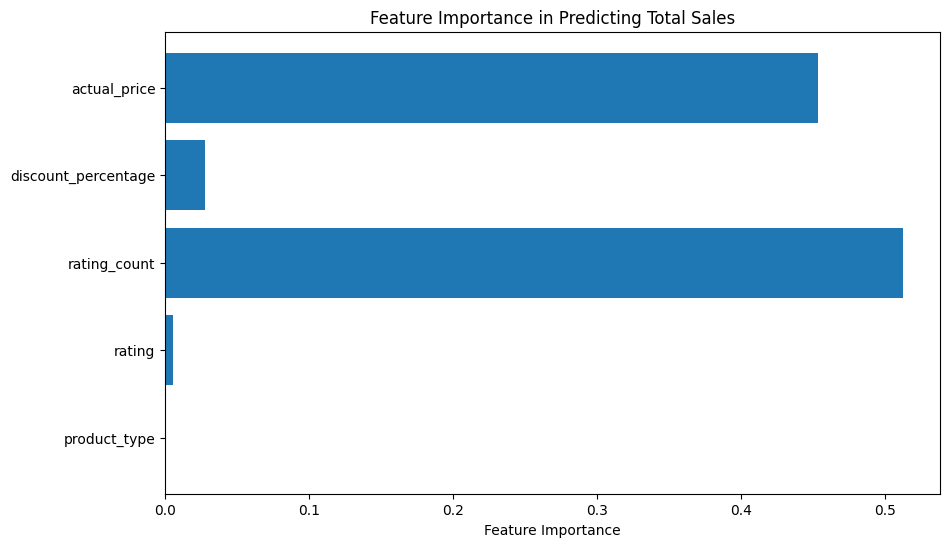

In [24]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

df = df[['product_type', 'rating', 'rating_count', 'discount_percentage', 'actual_price', 'total_sales']]

# Drop rows with missing values (you could also fill missing values if needed)
df = df.dropna()

# Encode the categorical 'product_type' using Label Encoding
label_encoder = LabelEncoder()
df['product_type'] = label_encoder.fit_transform(df['product_type'])

# Define the features (X) and target variable (y)
X = df[['product_type', 'rating', 'rating_count', 'discount_percentage','actual_price']]  # Features
y = df['total_sales']  # Target variable

# Split the data into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the RandomForestRegressor model (you can try other models as well)
model = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model's performance using MSE, RMSE, and R² score
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

# Print the accuracy metrics
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"R² Score: {r2}")

# Plot the predicted vs actual total_sales values
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='blue', alpha=0.6)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linewidth=2)
plt.xlabel('Actual Total Sales')
plt.ylabel('Predicted Total Sales')
plt.title('Actual vs Predicted Total Sales')
plt.show()

# Feature Importance Analysis (to see which features are most important for the model)
feature_importances = model.feature_importances_
feature_names = X_train.columns

# Plot feature importance
plt.figure(figsize=(10, 6))
plt.barh(feature_names, feature_importances)
plt.xlabel('Feature Importance')
plt.title('Feature Importance in Predicting Total Sales')
plt.show()
